In [3]:
import pyreadr #biblioteca para carregar dados ".RData"

In [4]:
vestibular = pyreadr.read_r('Vestibular.RData') #carregar arquivo "Vestibular.RData"
vestibular #mostrar

OrderedDict([('Vestibular',
                   estudante  matematica  fisica  quimica
              0     Gabriela         3.7     2.7      9.1
              1  Luiz Felipe         7.8     8.0      1.5
              2     Patricia         8.9     1.0      2.7
              3       Ovidio         7.0     1.0      9.0
              4       Leonor         3.4     2.0      5.0)])

**OrderedDict** é um tipo de varíavel semelhante ao **dict**. A diferença é que **OrderedDict** preserva a ordem em que as chaves são inseridas. Um **dict** regular não rastreia a ordem de inserção e a iteração fornece os valores em uma ordem arbitrária.

In [5]:
type(vestibular) #para vefiricar o tipo de variável

collections.OrderedDict

In [6]:
vestibular_df = vestibular['Vestibular'] #carregando o dataframe que havia dentro da variável "vestibular"
vestibular_df

,estudante,matematica,fisica,quimica
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patricia,8.9,1.0,2.7
3,Ovidio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


In [7]:
import plotly.express as px #biblioteca para realizar gráficos 3D e interativos
fig = px.scatter_3d(vestibular_df, x='matematica', y='fisica', z='quimica', color='estudante',  width=600, height=600)
fig.show()

In [8]:
vestibular_df.describe() #estatísticas descritivas, equivale ao "summary() do R"

,matematica,fisica,quimica
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


In [9]:
from sklearn.preprocessing import StandardScaler #biblioteca que faz a padronização (ZScore)

Importante etapa do tratamento dos dados é a normalização, quando se há unidades de medidas distintas (não é o casa para este dataset)

In [10]:
vestibular_valores_df = vestibular_df.iloc[0:,1:] #fatia do dataframe sem a coluna "estudantes" (coluna com varíaveis categóricas)
ss = StandardScaler() #chamar a função
vestibular_normalizado = ss.fit_transform(vestibular_valores_df) #normalizar
vestibular_normalizado

array([[-1.10968538, -0.09193849,  1.15930628],
       [ 0.73979036,  1.93837011, -1.26122325],
       [ 1.2359909 , -0.74316957, -0.87903438],
       [ 0.37891697, -0.74316957,  1.12745709],
       [-1.24501285, -0.36009248, -0.14650575]])

In [11]:
import pandas as pd #biblioteca que manipula dataframes
vestibular_normalizado_df = pd.DataFrame(vestibular_normalizado, columns = ['Matemática','Física','Química'])
vestibular_normalizado_df = pd.concat([vestibular_df[['estudante']], vestibular_normalizado_df], axis=1) #concatenar dataframes

In [12]:
#plotar o bloxplot das disiplinas
import plotly.graph_objects as go 
fig = go.Figure()
for i in range(1, 4):
    fig.add_trace(go.Box(y=vestibular_normalizado_df[vestibular_normalizado_df.columns[i]], name=vestibular_normalizado_df.columns[i]))
fig.show()

Matriz de dissimilaridade

In [27]:
from scipy.spatial.distance import pdist #calcular a distância
from scipy.spatial.distance import squareform

In [28]:
dist_euclidiana = pdist(X=vestibular_normalizado, metric='euclidean')
dist_euclidiana = squareform(dist_euclidiana)
print("Euclidiana")
dist_euclidiana

Euclidiana


array([[0.        , 3.66083006, 3.17507981, 1.62513177, 1.33991237],
       [3.66083006, 0.        , 2.75371356, 3.60924901, 3.23496046],
       [3.17507981, 2.75371356, 0.        , 2.18187619, 2.61509576],
       [1.62513177, 3.60924901, 2.18187619, 0.        , 2.09925641],
       [1.33991237, 3.23496046, 2.61509576, 2.09925641, 0.        ]])

In [30]:
dist_minkowski = pdist(X=vestibular_normalizado, metric='minkowski')
dist_minkowski = squareform(dist_minkowski)
print("Minkowski")
dist_minkowski

Minkowski


array([[0.        , 3.66083006, 3.17507981, 1.62513177, 1.33991237],
       [3.66083006, 0.        , 2.75371356, 3.60924901, 3.23496046],
       [3.17507981, 2.75371356, 0.        , 2.18187619, 2.61509576],
       [1.62513177, 3.60924901, 2.18187619, 0.        , 2.09925641],
       [1.33991237, 3.23496046, 2.61509576, 2.09925641, 0.        ]])

In [33]:
dist_chebyshev = pdist(X=vestibular_normalizado, metric='chebyshev')
dist_chebyshev = squareform(dist_chebyshev)
print("Chebyshev")
dist_chebyshev

Chebyshev


array([[0.        , 2.42052953, 2.34567628, 1.48860236, 1.30581204],
       [2.42052953, 0.        , 2.68153969, 2.68153969, 2.29846259],
       [2.34567628, 2.68153969, 0.        , 2.00649147, 2.48100375],
       [1.48860236, 2.68153969, 2.00649147, 0.        , 1.62392982],
       [1.30581204, 2.29846259, 2.48100375, 1.62392982, 0.        ]])

In [ ]:
#########

array([3.66083006, 3.17507981, 1.62513177, 1.33991237, 2.75371356,
       3.60924901, 3.23496046, 2.18187619, 2.61509576, 2.09925641])

In [19]:
from scipy.spatial import distance_matrix
distance_matrix([[0,0],[0,1],[2,1]], [[1,0],[1,1],[0,1]])

array([[1.        , 1.41421356, 1.        ],
       [1.41421356, 1.        , 0.        ],
       [1.41421356, 1.        , 2.        ]])

In [14]:
disciplinas = {'fisica', 'quimica', 'matematica'}

In [15]:
pdist(X=vestibular[vestibular.keys()], metric='euclidean')

TypeError: unhashable type: 'odict_keys'

In [ ]:
vestibular[vestibular.keys()]

TypeError: unhashable type: 'odict_keys'

array([3.66083006, 3.17507981, 1.62513177, 1.33991237, 2.75371356,
       3.60924901, 3.23496046, 2.18187619, 2.61509576, 2.09925641])

In [ ]:
vestibular['Vestibular']

OrderedDict([('Vestibular',
                   estudante  matematica  fisica  quimica
              0     Gabriela         3.7     2.7      9.1
              1  Luiz Felipe         7.8     8.0      1.5
              2     Patricia         8.9     1.0      2.7
              3       Ovidio         7.0     1.0      9.0
              4       Leonor         3.4     2.0      5.0)])

In [18]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(pdist(X=vestibular_normalizado, metric='euclidean'), pdist(X=vestibular_normalizado, metric='euclidean'))
print(dist)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(vestibular_normalizado)

In [ ]:
y_hc

array([4, 2, 3, 1, 0], dtype=int64)

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

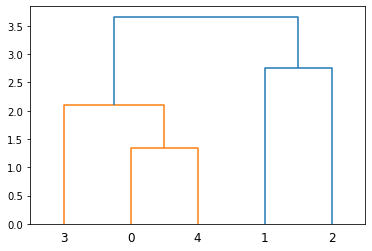

In [ ]:
mergings = linkage(vestibular_normalizado, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
for i in range(1, 4):
    vestibular.columns[i]

In [ ]:
vestibular.columns

Index(['estudante', 'matematica', 'fisica', 'quimica'], dtype='object')

In [ ]:
disciplinas = {'fisica':'Física', 'quimica':'Química', 'matematica':'Matemática'}
fig = go.Figure()
for disciplina in disciplinas:
    fig.add_trace(go.Box(y=Vestibular[disciplina],
                         boxpoints='all', 
                         jitter=0.3, 
                         pointpos=-1.8,
                         text=Vestibular['estudante'],
                         name = disciplinas[disciplina]))
fig.show()

In [ ]:
#Scaling of data


array([[-1.10968538, -0.09193849,  1.15930628],
       [ 0.73979036,  1.93837011, -1.26122325],
       [ 1.2359909 , -0.74316957, -0.87903438],
       [ 0.37891697, -0.74316957,  1.12745709],
       [-1.24501285, -0.36009248, -0.14650575]])

In [ ]:
vestibular.columns

Index(['estudante', 'matematica', 'fisica', 'quimica'], dtype='object')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 3.7134889152529063, 3.7134889152529063, 0.0],
  [0.0, 4.170132272026738, 4.170132272026738, 3.7134889152529063],
  [0.0, 6.044832051880879, 6.044832051880879, 4.170132272026738],
  [0.0, 7.186793363913502, 7.186793363913502, 6.044832051880879]],
 'ivl': ['1', '2', '4', '0', '3'],
 'leaves': [1, 2, 4, 0, 3],
 'color_list': ['C1', 'C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C1']}

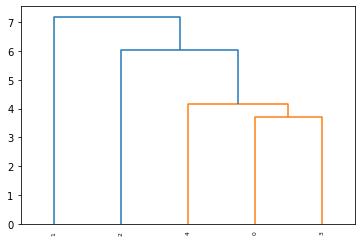

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(vestibular.iloc[0:,1:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(vestibular.iloc[:,:],method = 'single')

ValueError: could not convert string to float: 'Gabriela'

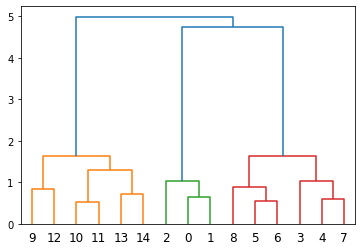

In [ ]:
vestibular

base = ([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

scaler = StandardScaler()
base = scaler.fit_transform(base)

dendrograma = dendrogram(linkage(base, method = 'ward'))


hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(base)